# Arabic-Opinion-Analysis & Detection

# Part 1: Data Collection and Preparation 

<h3 style="color: brown;">Data Extraction</h3>

+ **Connect to Hespress, then choose a theme to analyze by providing a URL**

In [1]:
# Article
url = "https://www.hespress.com/%d9%84%d9%82%d8%ac%d8%b9-%d9%8a%d8%ae%d8%b5%d8%b5-%d8%ac%d9%84%d8%b3%d8%a9-%d9%85%d8%ad%d8%a7%d8%b3%d8%a8%d8%a9-%d9%84%d9%84%d8%b1%d9%83%d8%b1%d8%a7%d9%83%d9%8a-1308792.html"

+ **Define Headers to grant Scraping permission using the agent**
  
**Headers:** This is a dictionary that contains information about the HTTP header. In particular, it specifies the "User-Agent" header which indicates to the remote server the type of client making the request. In this example, the "User-Agent" is configured to resemble that of a Chrome browser on a Windows system.

**Request(url, None, headers=headers):** This creates an instance of the Request class provided by the urllib.request module. This instance is used to encapsulate the HTTP request to be sent.

In [2]:
from urllib.request import Request

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

request = Request(url,None,headers=headers)

+ **Open connection to specified URL**
    
Open the connection to the URL specified in the request object and obtain the server response; returns an object of type http.client.HTTPResponse.

In [3]:
from urllib.request import urlopen

page = urlopen(request)
page

To extract the HTML code of the page, use the **.read()** method of the HTTPResponse, which returns a sequence of octets. 
Then use **decode()** to decode the octets into a string using UTF-8.

+ **Read the content of the page**

In [4]:
content = page.read()

+ **Decode the content to UTF-8 using decode**

In [5]:
decoded_content = content.decode("utf-8")

+ **Show the decoded content**

In [6]:
print(decoded_content)

<!DOCTYPE html>
<html class="no-js" dir="rtl" lang="ar">
  <head>
    <meta charset="UTF-8">
    <title>لقجع يخصص &quot;جلسة محاسبة&quot; للركراكي</title>
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <link rel="preconnect" href="//www.google-analytics.com" />
    <link rel="preconnect" href="//www.googletagmanager.com" />

        <link rel="preload" href="https://i1.hespress.com/wp-content/themes/hespress/fonts/Hespress-Medium.woff" as="font" type="font/woff" crossorigin="anonymous">
    <link rel="preload" href="https://i1.hespress.com/wp-content/themes/hespress/fonts/Hespress-SemiBold.woff" as="font" type="font/woff" crossorigin="anonymous">
    <link rel="preload" href="https://i1.hespress.com/wp-content/themes/hespress/fonts/Hespress-Bold.woff" as="font" type="font/woff" crossorigin="anonymous">
                <script>document.getElementsByTagName('html')[0].classList.replace("no-js" , localStorage.getItem("nightmode")=='1' ? 'nig

<h3 style="color: brown;">Data Preprocessing</h3>

+ **Extract text from HTML using string methods to search for tags (class="comment-text")
   in order to retrieve comments from the web page**

-- Fist Approch : 

In [7]:
# Search for the index of the first occurrence of start_tag which is <div class="comment-text">

start_tag = '<div class="comment-text">'
start_index = decoded_content.find(start_tag)

Search for the index of the first occurrence of end_tag, but starts the search from the index start_index + len(start_tag). 
This allows finding the end of the div tag that corresponds to the beginning or start tag found previously.


In [8]:
end_tag = '</div>'
end_index = decoded_content.find(end_tag, start_index + len(start_tag))

+ **Extract the text between the tags, the comments, and display them**

In [9]:
# Initialize the start index
start_index = 0
# Iterate to extract all comments
while start_index != -1:
   # Search for the start tag
   start_index = decoded_content.find(start_tag, start_index)
   # If the start tag is found
   if start_index != -1:
       # Find the end tag from the start index
       end_index = decoded_content.find(end_tag, start_index + len(start_tag))
       # Extract the text between the tags
       comment_text = decoded_content[start_index + len(start_tag):end_index]
       # Display the extracted text 
       print(comment_text)
       # Update the start index for the next iteration
       start_index = end_index


                <p>سبب الهزيمة هو دخول الركراكي في أمور  تافهة.</p>
            

                <p>على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب.هذه هي المحاسبة الحقيقية</p>
            

                <p>يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها  أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة.</p>
            

                <p>لا يجب الاستغناء عن خدمات الركراكي، من الافضل إعطاءه فرصة اخرى… المنتخب ينقصه مهاجم هدااااف وبدلاء للنجوم في حالة الإصابة</p>
            

                <p>من باب الإهانة أن يصير رمزي مساعدا لمدرب هاوي كالركراكي ربما العكس هو الصحيح أي أن يصير الركراكي عضوا في فريق رمزي مهمته هي تحفيز اللاعبين و إضحاكهم فهذا كل ما يجيده الرجل و  لأن طرد الركراكي كمدرب هو أقل شيء يمكن القبول به بعد المهزلة</p>
            

    

-- Second Approch : 

+ **Use BeautifulSoup**

In [10]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(decoded_content, 'html.parser')

# Find all div tags with the "comment-text" class

comment_divs = soup.find_all('div', class_='comment-text')
comment_divs

[<div class="comment-text">
 <p>سبب الهزيمة هو دخول الركراكي في أمور  تافهة.</p>
 </div>,
 <div class="comment-text">
 <p>على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب.هذه هي المحاسبة الحقيقية</p>
 </div>,
 <div class="comment-text">
 <p>يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها  أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة.</p>
 </div>,
 <div class="comment-text">
 <p>لا يجب الاستغناء عن خدمات الركراكي، من الافضل إعطاءه فرصة اخرى… المنتخب ينقصه مهاجم هدااااف وبدلاء للنجوم في حالة الإصابة</p>
 </div>,
 <div class="comment-text">
 <p>من باب الإهانة أن يصير رمزي مساعدا لمدرب هاوي كالركراكي ربما العكس هو الصحيح أي أن يصير الركراكي عضوا في فريق رمزي مهمته هي تحفيز اللاعبين و إضحاكهم فهذا كل ما يجيده الرجل و  لأن طرد الركراكي كمدرب هو أقل شيء يمكن 

-- From multiple articles :

In [11]:
import asyncio
import aiohttp

async def fetch(url, session):
    async with session.get(url, allow_redirects=False) as response:
        return await response.text()

In [12]:
async def get_comments(url):
    async with aiohttp.ClientSession(headers=headers) as session:
            html = await fetch(url, session)
            soup = BeautifulSoup(html, 'html.parser')
       # Find all div tags with the "comment-text" class
            comment_divs = soup.find_all('div', class_='comment-text')

       # Loop through the tags and extract the text
            for comment_div in comment_divs:
                 comment_text = comment_div.get_text(strip=True)
                 print(f"-{comment_text}\n")

In [13]:
import nest_asyncio
nest_asyncio.apply()
async def main():
    urls = [
        "https://www.hespress.com/%d8%a7%d9%84%d9%85%d8%ba%d8%b1%d8%a8-%d9%8a%d9%8f%d8%ad%d8%af%d8%ab-%d9%83%d9%84%d9%8a%d8%a7%d8%aa-%d8%b7%d8%a8-%d8%ac%d8%af%d9%8a%d8%af%d8%a9-%d9%84%d9%85%d9%88%d8%a7%d8%ac%d9%87%d8%a9-%d8%a7%d9%84-1311228.html",
        "https://www.hespress.com/%d8%aa%d8%b3%d8%b1%d9%8a%d8%a8%d8%a7%d8%aa-%d8%b3%d9%86%d8%a7%d8%a8-%d8%b4%d8%a7%d8%aa-%d8%aa%d9%8f%d8%b3%d8%a7%d8%a6%d9%84-%d9%8a%d9%82%d8%b8%d8%a9-%d8%a7%d9%84%d9%85%d8%ba%d8%b1%d8%a8%d9%8a-1311280.html",
        # Add as much urls as needed
        "https://www.hespress.com/%d8%a7%d9%84%d9%85%d8%ba%d8%b1%d8%a8-%d9%8a%d9%88%d8%a7%d9%83%d8%a8-%d8%a7%d9%84%d8%aa%d8%ad%d9%88%d9%84-%d9%81%d9%8a-%d9%85%d8%ac%d8%a7%d9%84-%d8%a7%d9%84%d8%b0%d9%83%d8%a7%d8%a1-%d8%a7%d9%84%d8%a7-1310845.html",
        "https://www.hespress.com/%d8%aa%d9%82%d8%a7%d8%b1%d9%8a%d8%b1-%d9%85%d8%a8%d8%a7%d8%b1%d8%a7%d8%a9-%d9%88%d8%af%d9%8a%d8%a9-%d8%aa%d9%86%d8%aa%d8%b8%d8%b1-%d8%a7%d9%84%d9%85%d8%ba%d8%b1%d8%a8-%d9%88%d8%a7%d9%84%d8%a3%d9%88-1310094.html",
        "https://www.hespress.com/%d9%84%d9%82%d8%ac%d8%b9-%d9%8a%d8%ae%d8%b5%d8%b5-%d8%ac%d9%84%d8%b3%d8%a9-%d9%85%d8%ad%d8%a7%d8%b3%d8%a8%d8%a9-%d9%84%d9%84%d8%b1%d9%83%d8%b1%d8%a7%d9%83%d9%8a-1308792.html",
    ]

    tasks = [get_comments(url) for url in urls]

    # Launch tasks in parallel
    await asyncio.gather(*tasks)

# Launch the main program
if __name__ == "__main__":
    asyncio.run(main())

-سبب الهزيمة هو دخول الركراكي في أمور  تافهة.

-على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب.هذه هي المحاسبة الحقيقية

-يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها  أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة.

-لا يجب الاستغناء عن خدمات الركراكي، من الافضل إعطاءه فرصة اخرى… المنتخب ينقصه مهاجم هدااااف وبدلاء للنجوم في حالة الإصابة

-من باب الإهانة أن يصير رمزي مساعدا لمدرب هاوي كالركراكي ربما العكس هو الصحيح أي أن يصير الركراكي عضوا في فريق رمزي مهمته هي تحفيز اللاعبين و إضحاكهم فهذا كل ما يجيده الرجل و  لأن طرد الركراكي كمدرب هو أقل شيء يمكن القبول به بعد المهزلة

-ومن يحاسب السيد لقجع ؟؟؟المدرب  نهج استراتيجية و منهجا حظي بموافقة رئيس الجامعة وبالتالي فكلاهما يلزم مساءلتهما !!!

-ماذا فعل الركراكي ليحاسب الرجل بذل جهده و اكثر ليتألق المنتخب

+ **List the characteristics of the retrieved comments**

In [14]:
# Find all div tags with the class "comment-head" or "comment-body" 

comment_heads = soup.find_all('div', class_='comment-body')
for comment_head in comment_heads:
    comment_head = comment_head.get_text(strip=False)
    print(f"({comment_head}\n\n)")

( 

simo 

                    الأحد 4 فبراير 2024 - 22:35                


سبب الهزيمة هو دخول الركراكي في أمور  تافهة.




321




                        أضف تعليق                        

                        أعلى الصفحة                    

تعليق غير لائق





)
( 

احمد 

                    الأحد 4 فبراير 2024 - 22:36                


على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب.هذه هي المحاسبة الحقيقية




-299




                        أضف تعليق                        

                        أعلى الصفحة                    

تعليق غير لائق





)
( 

محمد سلا 

                    الأحد 4 فبراير 2024 - 22:36                


يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها  أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة.




237






+ **Extract arabic comments** 

In [15]:
import re 

comments = [comment.get_text(strip=True) for comment in comment_divs]
arabic_comments = [re.sub(r'[^\d؀-ۿ]', ' ', comment) for comment in comments]

+ **Apply the necessary preprocessing to your data, starting with removing HTML tags**

To remove HTML tags from the text contained within tags
with the **'comment-text'** class, you can use BeautifulSoup's **get_text()** method.

In [16]:
cleaned_comments = [re.sub('<.*?>', '', comment) for comment in arabic_comments]

We group the two lines of code into one to display only Arabic text without HTML tags, each comment is displayed in parentheses.

In [17]:
for comment_div in comment_divs:
    comment_text = comment_div.get_text(strip=False)
    # Conserve only the arabic letters and numbers 
    cleaned_comments = re.sub(r'[^\d؀-ۿ]', ' ', comment_text)
    print(f"({cleaned_comments}\n\n)")

( سبب الهزيمة هو دخول الركراكي في أمور  تافهة  

)
( على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب هذه هي المحاسبة الحقيقية 

)
( يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها  أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة  

)
( لا يجب الاستغناء عن خدمات الركراكي، من الافضل إعطاءه فرصة اخرى  المنتخب ينقصه مهاجم هدااااف وبدلاء للنجوم في حالة الإصابة 

)
( من باب الإهانة أن يصير رمزي مساعدا لمدرب هاوي كالركراكي ربما العكس هو الصحيح أي أن يصير الركراكي عضوا في فريق رمزي مهمته هي تحفيز اللاعبين و إضحاكهم فهذا كل ما يجيده الرجل و  لأن طرد الركراكي كمدرب هو أقل شيء يمكن القبول به بعد المهزلة 

)
( ومن يحاسب السيد لقجع ؟؟؟المدرب  نهج استراتيجية و منهجا حظي بموافقة رئيس الجامعة وبالتالي فكلاهما يلزم مساءلتهما     

)
( ماذا فعل الركراكي ليحاسب الرجل بذل ج

+ **Save the entire text in a txt format file**

In [18]:
with open('comments_output.txt', 'w', encoding='utf-8') as file:
    for comment in cleaned_comments:
        file.write(comment + '\n\n')
print("Text has been saved to 'comments_output.txt'")

Text has been saved to 'output.txt'


<h3 style="color: brown;">Text Annotation</h3>

**What are the possible annotations for the retrieved text?**

+ Positive
+ Positive++
+ Negative
+ Negative++
+ Sarcastic
+ Mixed
  
**We choosed :**

+ With Resignation
+ Against Resignation
+ Mixed (unspecified)

+ **Annotate it using the Crowdsourcing method. Every three students must annotate the same comments.**

-- First Annotator : 

In [19]:
annotations_1= ["Mixed","With","Against","Against","With","Mixed","Against","Mixed","Against","Against","Mixed","With","Against","Against",
                 "With","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Against","Against","With","With","Mixed",
                 "Mixed","Against","Against","Against","With","With","Mixed","Against","Against","With","Mixed","With","Mixed","With","Mixed","Mixed",
                 "Against","Mixed","Mixed","Mixed","With","With","Mixed","Mixed","With","With","Mixed","Mixed","Mixed",
                 "Mixed","Mixed","Against","Against","Mixed","Against","Mixed","Mixed","Mixed","Against","Mixed","Against","With","With",
                "Against","Mixed","With","Against","Mixed","With","With","Mixed","Mixed","Against"]


In [20]:
number_of_opinions = len(annotations_1)
print("number of opinions :",number_of_opinions)

number of opinions : 83


Save annotations for each comment to a file for each annotator.

In [21]:
with open('annotations_1.txt','w',encoding='utf-8')as annotation_file:
    for annotation in annotations_1:
        annotation_file.write(annotation + '')
print("Text has been saved to 'annotations_1.txt'")

Text has been saved to 'annotations_1.txt'


-- Second Annotator :

In [22]:
annotations_2 = ["Mixed","With","Against","Against","With","Mixed","Against","Mixed","Against","Against","Mixed","With","Against","Against",
                 "With","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Against","Against","With","With","Mixed",
                 "Mixed","Against","Against","Against","With","With","Mixed","Against","Against","With","Mixed","With","Mixed","With","Mixed","Mixed",
                 "Against","Mixed","Mixed","Mixed","With","With","Mixed","Mixed","With","With","Mixed","Mixed","Mixed",
                 "Mixed","Mixed","Against","Against","Mixed","Against","Mixed","Mixed","Mixed","Against","Mixed","Against","With","With",
                "Against","Mixed","With","Against","Mixed","Mixed","With","Mixed","Mixed","Against"]

In [23]:
with open('annotations_2.txt','w',encoding='utf-8')as annotation_file:
    for annotation in annotations_2:
        annotation_file.write(annotation + '')
print("Text has been saved to 'annotations_2.txt'")

Text has been saved to 'annotations_2.txt'


-- Third Annotator :  

In [24]:
annotations_3= ["Mixed","With","Against","Against","With","Mixed","Against","Mixed","Against","Against","Mixed","With","Against","Against",
                 "With","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Mixed","Against","Against","With","With","Mixed",
                 "Mixed","Against","Against","Against","With","With","Mixed","Against","Against","With","Mixed","With","Mixed","With","Mixed","Mixed",
                 "Against","Mixed","Mixed","Mixed","With","With","Mixed","Mixed","With","With","Mixed","Mixed","Mixed",
                 "Mixed","Mixed","Against","Against","Mixed","Against","Mixed","Mixed","Mixed","Against","Mixed","Against","With","With",
                "Against","Mixed","With","Against","Mixed","With","With","Mixed","Mixed","Against"]

In [25]:
with open('annotations_3.txt','w',encoding='utf-8')as annotation_file:
    for annotation in annotations_3:
        annotation_file.write(annotation + '')
print("Text has been saved to 'annotations_3.txt'")

Text has been saved to 'annotations_3.txt'


+ **Observation :**

In the case of sentiment annotations, the annotations may differ due to the interpretation and perspective of each annotator. 
It is rare to find complete agreement among annotators; there is always some margin of difference.
When it comes to opinion expression, it is generally based on logic and observation, making it easier to detect whether the comment explicitly and clearly expresses an opinion either in favor or against. 
The only case where we might have disagreement is when the annotation is done without awareness.

+ **Majority Voting Aggregation :**


In [26]:

aggregated_annotations = [max(set(annotations), key=annotations.count) for annotations in zip(annotations_1, annotations_2, annotations_3)]
print(aggregated_annotations)

['Mixed', 'With', 'Against', 'Against', 'With', 'Mixed', 'Against', 'Mixed', 'Against', 'Against', 'Mixed', 'With', 'Against', 'Against', 'With', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Against', 'Against', 'With', 'With', 'Mixed', 'Mixed', 'Against', 'Against', 'Against', 'With', 'With', 'Mixed', 'Against', 'Against', 'With', 'Mixed', 'With', 'Mixed', 'With', 'Mixed', 'Mixed', 'Against', 'Mixed', 'Mixed', 'Mixed', 'With', 'With', 'Mixed', 'Mixed', 'With', 'With', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed', 'Against', 'Against', 'Mixed', 'Against', 'Mixed', 'Mixed', 'Mixed', 'Against', 'Mixed', 'Against', 'With', 'With', 'Against', 'Mixed', 'With', 'Against', 'Mixed', 'With', 'With', 'Mixed', 'Mixed', 'Against']


+ **Comparison with individual annotations :**

In [27]:
for index, (annotation1, annotation2, annotation3) in enumerate(zip(annotations_1, annotations_2, annotations_3)):
    if aggregated_annotations[index] != annotation1 == annotation2 == annotation3:
        print(f"Disagreement for Comment {index + 1}")

In [28]:
with open('aggregated_annotations.txt','w',encoding='utf-8')as annotation_file:
    for annotation in aggregated_annotations:
        annotation_file.write(annotation + '')
print("Text has been saved to 'aggregated_annotations.txt'")

Text has been saved to 'aggregated_annotations.txt'


+ **Calculate Cohen’s Kappa inter-annotator agreement rate :**

In [29]:
from sklearn.metrics import cohen_kappa_score

# Convert string labels to numerical labels
label_mapping = {"Mixed": 2, "With": 1, "Against": 0}

labels_annotator1 = [label_mapping[label] for label in annotations_1]
labels_annotator2 = [label_mapping[label] for label in annotations_2]
labels_annotator3 = [label_mapping[label] for label in annotations_3]

# Calculate Cohen's Kappa for 2 first annotators
kappa = cohen_kappa_score(labels_annotator1, labels_annotator2)

# Print the result
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.9808755760368664


+ **Gather the annotated comments :** 

In [30]:
# Read the opinion annotations from the file
with open('aggregated_annotations.txt', 'r', encoding='utf-8') as annotations_file:
    opinion_annotations = [line.strip() for line in annotations_file]
    
with open('comments_output.txt', 'r', encoding='utf-8') as comments_file:
# Read the comments, considering newline and empty line as a separator
    comments = [line.strip() for line in comments_file.read().split(')(')]

# Zip comments and aggregated_annotations together
for comment_index, (comment, annotation) in enumerate(zip(comments, aggregated_annotations)):
          print(f"Comment {comment_index + 1}: {comment}\nAnnotation: {annotation}\n")

Comment 1: (سبب الهزيمة هو دخول الركراكي في أمور تافهة
Annotation: Mixed

Comment 2: على الركراكي وطاقيه الفني ان يرحل ليس عنده مايعطيه للمنتخب هذه هي المحاسبة الحقيقية
Annotation: With

Comment 3: يجب الوقوف على الأخطاء التي ارتكبت في لقاء المغرب و جنوب أفريقيا و كذا المقابلات السابقة و الوقوف على خطط المدرب في اللقاءات لأنها أصبحت مكشوفة لدى المدربين و كذا ترك العاطفة مع بعض اللاعبين و يجب أخذ العبرة من الفرق الإفريقية لأننا غيورين على الفريق الوطني و على هذا البلد بالتوفيق لوليد الركراكي في الاستحقاقات المقبلة
Annotation: Against

Comment 4: لا يجب الاستغناء عن خدمات الركراكي، من الافضل إعطاءه فرصة اخرى  المنتخب ينقصه مهاجم هدااااف وبدلاء للنجوم في حالة الإصابة
Annotation: Against

Comment 5: من باب الإهانة أن يصير رمزي مساعدا لمدرب هاوي كالركراكي ربما العكس هو الصحيح أي أن يصير الركراكي عضوا في فريق رمزي مهمته هي تحفيز اللاعبين و إضحاكهم فهذا كل ما يجيده الرجل و لأن طرد الركراكي كمدرب هو أقل شيء يمكن القبول به بعد المهزلة
Annotation: With

Comment 6: ومن يحاسب السيد لقجع ؟؟؟المدرب 

+ **Save to CSV file :**

In [31]:
import csv

# Writing to CSV file
csv_file_path = 'Comments_annotated.csv'  # Specify the desired file path

with open(csv_file_path, 'w', newline='',encoding='utf-8') as csvfile:
    fieldnames = ['Comment', 'Annotation']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write rows
    for comment_index, (comment, annotation) in enumerate(zip(comments, aggregated_annotations)):
        writer.writerow({'Comment': comment, 'Annotation': annotation})

print(f"Results have been written to {csv_file_path}")

Results have been written to Comments_annotated.csv


+ **Observation :**
We are also talking about what is called **Hate Speech** and **Sarcasm**, which can be added to the list of possible labels for a comment or text.

<h3 style="color: brown;">Data visualization</h3>

+ **Prior installation :**

In [32]:
#pip install wordcloud

In [33]:
#pip install arabic_reshaper

In [34]:
#pip install python-bidi

+ **Remove Stopwords :**
  
We remove the stopwords; there are other solutions like **NLTK** and **Spacy**.

In [35]:
import pandas as pd 

# Create a list of dictionaries
data = [{'Comment': comment, 'Annotation': annotation} for comment, annotation in zip(comments, aggregated_annotations)]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [36]:
# Load the stopwords from a file
with open('list.txt', 'r', encoding='utf-8') as f:
    stopwords_arabic = set(f.read().splitlines())

# Function to remove stopwords in Arabic
def supprimer_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_arabic]
    return ' '.join(filtered_words)

# Apply the stopwords removal function to the "Commentaire" column
df['Comment'] = df['Comment'].apply(supprimer_stopwords)

# Display the updated DataFrame
print(df)

                                              Comment Annotation
0               (سبب الهزيمة دخول الركراكي أمور تافهة      Mixed
1   الركراكي وطاقيه الفني يرحل عنده مايعطيه للمنتخ...       With
2   يجب الوقوف الأخطاء ارتكبت المغرب جنوب أفريقيا ...    Against
3   يجب الاستغناء خدمات الركراكي، الافضل إعطاءه فر...    Against
4   باب الإهانة يصير رمزي مساعدا لمدرب هاوي كالركر...       With
..                                                ...        ...
78  الإستهانة بمنافسة حجم كأس إفريقيا والتعامل بمن...       With
79  تعطى الفرصة للمدرب الكفؤ السلامي ؟ يجب ننسى فر...       With
80  منتخب الوطني معادلة حل يجب تركيز اشياء أخرى كر...      Mixed
81  سبب الطلوع غرور المدرب وبعض اللعيبه ومستوي حار...      Mixed
82  المهمة الاساسية للمدرب التخطيط الصراخليس حقه ا...    Against

[83 rows x 2 columns]


+ **WordCloud Generation :**

Then we generate our word cloud.

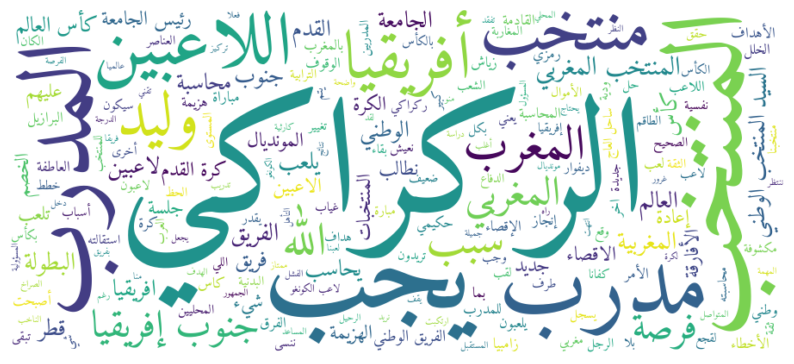

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# Retrieve the annotated comments from the DataFrame
annotated_comments = df['Comment'].tolist()

# Concatenate all annotated comments into a single string
concatenated_text = ' '.join(annotated_comments)

# Reshape the Arabic text to ensure letters are properly connected
reshaped_arabic_text = arabic_reshaper.reshape(concatenated_text)
display_text = get_display(reshaped_arabic_text)

# Generate the word cloud for the Arabic comments
arabic_wordcloud = WordCloud(
    width=900, 
    height=400, 
    background_color='white', 
    font_path='Amiri-Regular.ttf'
).generate(display_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(arabic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The terms that appear most frequently in my dataset are closely related to the topic around which the comments revolve. 
For example, the coach’s name, the word Team, Morocco, coach, football, play, players, World Cup, federation, etc. are commonly mentioned.

# Part 2: Data Usage

In the following section, we use the already annotated dataset, structured in a **CSV** format.

<h3 style="color: brown;">Data Re-annotating</h3>

+ **Import the dataset data.csv which contains reviews about Hespress article :**

In [38]:
df_f = pd.read_csv('newdataset_2.csv')
df_f.columns= ['CommentId','Comment','Sentiment']
df_f['Comment']= df['Comment']
df_f.head()

,CommentId,Comment,Sentiment
0,0,(سبب الهزيمة دخول الركراكي أمور تافهة,Négatif
1,1,الركراكي وطاقيه الفني يرحل عنده مايعطيه للمنتخ...,Négatif
2,2,يجب الوقوف الأخطاء ارتكبت المغرب جنوب أفريقيا ...,Positive
3,3,يجب الاستغناء خدمات الركراكي، الافضل إعطاءه فر...,Positive
4,4,باب الإهانة يصير رمزي مساعدا لمدرب هاوي كالركر...,Négatif


+ **Import the necessary libraries throughout the rest of script :**

In [39]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer

+ **Drop Duplicates :**

In [40]:
df_f.drop_duplicates(subset='Comment',keep ='first',inplace= True)

+ **Define The columns to be used :**

In [41]:
df_f = df_f[['Comment','Sentiment']]
df_f

,Comment,Sentiment
0,(سبب الهزيمة دخول الركراكي أمور تافهة,Négatif
1,الركراكي وطاقيه الفني يرحل عنده مايعطيه للمنتخ...,Négatif
2,يجب الوقوف الأخطاء ارتكبت المغرب جنوب أفريقيا ...,Positive
3,يجب الاستغناء خدمات الركراكي، الافضل إعطاءه فر...,Positive
4,باب الإهانة يصير رمزي مساعدا لمدرب هاوي كالركر...,Négatif
...,...,...
78,الإستهانة بمنافسة حجم كأس إفريقيا والتعامل بمن...,Négatif
79,تعطى الفرصة للمدرب الكفؤ السلامي ؟ يجب ننسى فر...,Négatif
80,منتخب الوطني معادلة حل يجب تركيز اشياء أخرى كر...,Négatif
81,سبب الطلوع غرور المدرب وبعض اللعيبه ومستوي حار...,Négatif


+ **Define the labels by which your corpus is annotated :**

As already mentioned, for this second part, I am relying on only two comment annotations (**Positive**, **Negative**).

In [42]:
df_f.Sentiment.value_counts()

Sentiment
Négatif     52
Positive    31
Name: count, dtype: int64

+ **Numerical Labeling for two classes :**

In [43]:
df_f['Sentiment'] = df_f['Sentiment'].replace({'Négatif': 0, 'Positive': 1})
print(df_f['Sentiment'])

0     0
1     0
2     1
3     1
4     0
     ..
78    0
79    0
80    0
81    0
82    0
Name: Sentiment, Length: 83, dtype: int64


+ **Use a **count plot** to visualize the class distribution before and after reclassification :**

If we go back to the opinion annotations given initially, we can deduce that the majority are against the coach’s resignation, while others did not specify their opinion regarding the resignation.



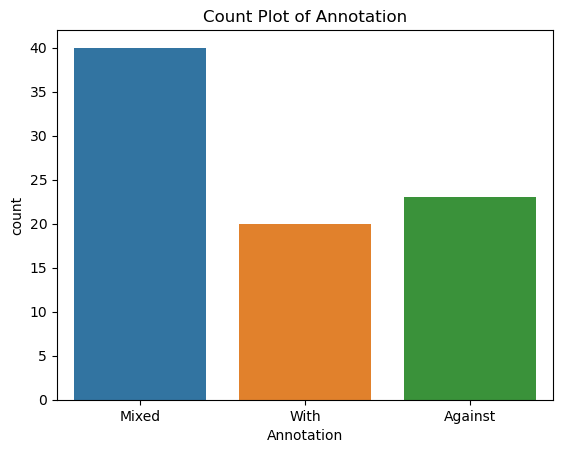

In [44]:
sns.countplot(data = df, x = df['Annotation'])
plt.title("Count Plot of Annotation")
plt.show()

After re-annotating these comments, we obtain the following plot :

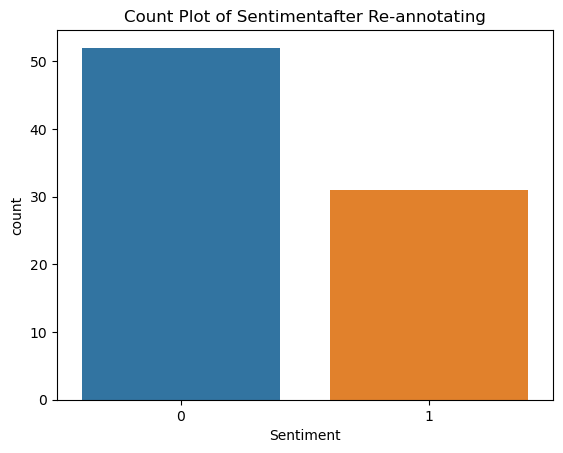

In [45]:
sns.countplot(data = df_f, x = df_f['Sentiment'])
plt.title("Count Plot of Sentimentafter Re-annotating")
plt.show()

+ **Observation :**

After redistributing into two classes, we notice an imbalance in their distribution: **class 0** has more instances than **class 1**. Thus, there is a majority class and a minority class, which can negatively affect the model’s performance. Therefore, we need to balance our dataset.

<h3 style="color: brown;">Data Balancing</h3>

**What are the possible approaches to balance the data?**

♦ We can reduce the number of instances in the majority class to match the number of instances in the minority class, 
or increase the number of instances in the minority class to be equivalent to that of the majority class.



♦ Examples of existing solutions to address this problem :

Resampling with Scikit-learn — we mainly refer to **downsampling**, **oversampling**, and **undersampling**.
**Data augmentation** using NLP techniques can also help by processing language with libraries that, for example, replace words with their synonyms.
**SMOTE** is used to generate synthetic data.
**PCA** (Principal Component Analysis) is often used to simplify the data while preserving as much information as possible.
The **GANs** library is considered one of the best solutions, as it generates data that is similar to the input data.

+ **Import the libraries for resampling :**

In [46]:
from sklearn.utils import resample

+ **Define the majority and minority classes :**

In [47]:
# majority class 0
df_majority = df_f[df_f['Sentiment'] == 0]
# minority class 1 
df_minority = df_f[df_f['Sentiment'] == 1]

+ **under-sampling the majority class :**

In [48]:
df_majority_downsampled = resample(df_majority,
                                   replace = False, 
                                   n_samples = len(df_minority),
                                   random_state = 1234)

+ **Combine the two classes :**

In [49]:
df_f = pd.concat([df_majority_downsampled, df_minority], ignore_index=True)
df_f.head()

,Comment,Sentiment
0,سبب هزيمة المغرب زاوية أخرى اللاعبون الترخيص ط...,0
1,السلام عليكم ورحمة وبركاته، كلام الصحيح المعلق...,0
2,أسباب اقصائنا غياب الفعالية االهجومية تضييع اه...,0
3,يجب إقالة الركراكي والبحث بديل لان نفسية وليد ...,0
4,أظن سيكون الأصلح للمرحلة القادمة، منتخب قوي يس...,0


View the dataset after balancing, as shown in the Count Plot below :

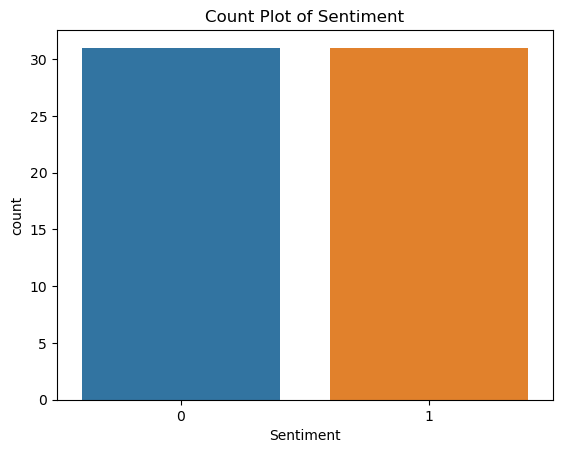

In [50]:
sns.countplot(data = df_f, x = df_f['Sentiment'])
plt.title("Count Plot of Sentiment")
plt.show()

+ **What some useful informations we can get :**
  
A **lexicon** including polar words and negation words can be useful. Moreover, the **occurrence of words** in a text and the presence of **punctuation** that carries a specific meaning or conveys information — for example, the appearance of an exclamation mark (!) at the end of a sarcastic comment — as well as **word similarity and frequency**, all play a significant role.

To extract these features, we can use the following techniques:

**Bag of Words (BoW):** Represents a document by simply counting how many times each word appears, without considering word order.
To do this, we create a vocabulary from all unique words in the corpus, then represent each document as a vector where each component corresponds to the number of occurrences of a given word in the document.

**TF-IDF (Term Frequency-Inverse Document Frequency):** Weights words in a document based on their frequency in that document and their rarity across the entire corpus, emphasizing important terms.

**Word2Vec:** Transforms words into vectors in a continuous space using neural network models. These models learn vector representations of words based on their context. They can capture semantic relationships, such as word similarity and analogies.

These three techniques can be categorized into two main approaches:

+ **Supervised approach:** Based on classical classifiers — such as **BoW** and **TF-IDF**.

+ **Unsupervised approach:** Based on neural networks — such as **Word2Vec**.



+ **Extract TF-IDF :**
  

In [51]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(df_f['Comment'])
y = df_f['Sentiment']

+ **Split data to 80% for training and 20% for test :**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(vector,y,test_size=0.2,random_state=42)

+ **Which metric is the most relevant and why?**
If we had kept the imbalance earlier for a skewed dataset, **recall** and **F1-score** can be more relevant. If the costs of classification errors vary, precision might be more appropriate.
It is often recommended to evaluate multiple metrics to get a complete picture of the model’s performance.

The best metric is the **F1-score**.

+ **Metrics for performance evaluation :**

In [53]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
    print("Training Accuracy = ", round(accuracy_score(y_train,y_train_pred),2)*100)
    print("\nTrain Classification Report : \n",classification_report(y_train,y_train_pred))
    train_CM = confusion_matrix(y_train,y_train_pred)
    print("\nTrain Confusion Matrix:\n ",train_CM )
    plt.show()
    print("Test Accuracy = ", round(accuracy_score(y_test,y_test_pred),2)*100)
    print("\nTest Classification Report : \n",classification_report(y_test,y_test_pred))
    test_CM = confusion_matrix(y_test,y_test_pred)
    print("\nTest Confusion Matrix:\n ",test_CM)
    plt.show()

+ **Lazy Predict to find the performant algorithm :**

In [54]:
from lazypredict.Supervised import LazyClassifier
X_train_dense = x_train.toarray()
X_test_dense = x_test.toarray()

# Convert dense arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train_dense, columns=[f'feature_{i}' for i in range(X_train_dense.shape[1])])
X_test_df = pd.DataFrame(X_test_dense, columns=[f'feature_{i}' for i in range(X_test_dense.shape[1])])

# Lazy Predict
clf = LazyClassifier()
models, predictions = clf.fit(X_train_df, X_test_df, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 25, number of negative: 24
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 49, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510204 -> initscore=0.040822
[LightGBM] [Info] Start training from score 0.040822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

+ **Call the metrics to display the results for SVM :**

In [61]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

In [62]:
metrics(y_train,y_train_pred,y_test,y_test_pred)

Training Accuracy =  100.0

Train Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        25

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Train Confusion Matrix:
  [[24  0]
 [ 0 25]]
Test Accuracy =  62.0

Test Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.60      0.50      0.55         6

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13


Test Confusion Matrix:
  [[5 2]
 [3 3]]


**Give possible approaches to improve classification according to the following indicators:
Preprocessing, Feature Extraction, Classifier Used**

**We can :**

✅ Add more data, since the current dataset is very small.

✅ Test other algorithms while tuning their parameters.

✅ Use neural network algorithms if a large portion of data is collected.

✅ Add more data preprocessing steps. We can also try extracting features using other methods.

✅ Add a stemming step, which is a process that reduces a word to its root or base form. For example, the stem of "running" could be "run".

✅ Add lemmatization, which is similar to stemming but takes the word's morphology into account

+ **Translate the comments into French, then into English, and each time redo the classification :**

In [57]:
#!pip install googletrans==4.0.0-rc1

**French Translation :**

In [64]:
from googletrans import Translator

translator = Translator()
# Translate to FR
df_fr = df_f.copy()
df_fr['Comment'] = df_fr['Comment'].apply(lambda x: translator.translate(x, dest='fr').text)
# Save the result to CSV
fr_path = 'translate_fr.csv'
df_fr.to_csv(fr_path, index=False)
df_fr.to_csv('translate_fr.csv', index=False)

In [65]:
# Keep only 'Comment' and 'Sentiment' columns
df_fr = df_fr[['Comment', 'Sentiment']]
df_fr.head(3)

,Comment,Sentiment
0,La raison de la défaite du Maroc est un autre ...,0
1,"La paix, la miséricorde et les bénédictions de...",0
2,The reasons for our exclusion are the absence ...,0


In [66]:
# Translate to ENG
df_en = df_fr.copy()
df_en['Comment'] = df_en['Comment'].apply(lambda x: translator.translate(x, dest='en').text)
# Save the result to CSV
en_path = 'translate_en.csv'
df_en.to_csv(en_path, index=False)


In [67]:
# Keep only 'Comment' and 'Sentiment' columns
df_en = df_en[['Comment', 'Sentiment']]
df_en.head(3)

,Comment,Sentiment
0,The reason for the defeat of Morocco is anothe...,0
1,"The peace, mercy and blessings of God are over...",0
2,The reasons for our exclusion are the absence ...,0


**What we notice?**
We re-ran the classification for both the French and English translated datasets, and we obtained the following performance results:

In French: The translation degraded the F1-score to 55%, and even the accuracy dropped to 61%.

In English: The F1-score degraded from 67% (in Arabic) to 62% in English.
Arabic: 67% / French: 55% / English: 62%

**Size of the translated data:**
The size of the translated data corpus is a crucial factor contributing to these results. If the translated corpus is small, the benefits of translation might be limited. Moreover, translation can also introduce noise or alter the meaning of sentences, which may lead to degraded performance.

+ **Replace the words in your corpus with other forms (stems, lemmas). Use ISRIStemmer :**

In [68]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer

st = ISRIStemmer()

In [70]:
def filter_comments(comment):
    # Tokenization
    words = word_tokenize(comment)
    
    # Instantiate the stemmer for the Arabic language 
    st = ISRIStemmer()
    
    # Apply stemming
    stemmed_words = [st.stem(word) for word in words]
    
    return stemmed_words

df_f['Filtered_Comments'] = df_f['Comment'].apply(filter_comments)

In [71]:
df_f['Filtered_Comments'].sample(4)

46    [ليس, حسب, فسر, وقع, بطل, وين, خلل, حصل, نتج, ...
25    [سبب, طلع, غرر, درب, بعض, لعب, ستو, حرس, رمي, ...
57    [ركر, اهد, علم, جاز, حلم, قدر, هدء, كأس, فرق, ...
6                 [درب, سؤل, جهد, فرق, قوياء, نهى, كلم]
Name: Filtered_Comments, dtype: object

+ **Then we perform classification using SVM, following the previously done steps :**

In [72]:
# Select the columns 'Filtered_Comments' and 'Sentiment' from the DataFrame df_f
df_f_2 = df_f[['Filtered_Comments', 'Sentiment']]

# Initialize the TF-IDF vectorizer
tfidf_2 = TfidfVectorizer()

# Concatenate the words in each comment to create a single text string per comment
df_f_2['Filtered_Comments'] = df_f_2['Filtered_Comments'].apply(lambda x: ' '.join(x))

# Apply TF-IDF vectorization to the comments
vector_2 = tfidf_2.fit_transform(df_f_2['Filtered_Comments'])

# Extract the labels (Sentiment) from the original DataFrame
y = df_f_2['Sentiment']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(vector_2, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM model on the training set
svm.fit(x_train, y_train)

# Predict the labels on both test and training sets
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

# Evaluate the model performance using the metrics function
metrics(y_train, y_train_pred, y_test, y_test_pred)


Training Accuracy =  100.0

Train Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        25

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Train Confusion Matrix:
  [[24  0]
 [ 0 25]]
Test Accuracy =  77.0

Test Classification Report : 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.50      0.67         6

    accuracy                           0.77        13
   macro avg       0.85      0.75      0.75        13
weighted avg       0.84      0.77      0.75        13


Test Confusion Matrix:
  [[7 0]
 [3 3]]


+ **Observation :** According to the results, we have 77% Accuracy and 82% F1-Score; compared to before, we can say that stemming has the effect of improving the results in our particular case. The impact is therefore positive on the model’s performance results.